# CUSTOMER ANALYSIS FOR RETAIL

##### BUSINESS PROBLEM:
A Retail store is required to analyze the day-to-day transactions and keep a track of its customers 
spread across various locations along with their purchases/returns across various categories.

Create a report and display the below calculated metrics, reports and inferences.


In [2]:
#importing necessory libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
cust  =pd.read_csv("E:/dwnld/Python Foundation Case Study 1 - Retail Case Study/Customer.csv")
trans=pd.read_csv("E:/dwnld/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv")
prod=pd.read_csv("E:/dwnld/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv")

In [6]:


cust["customer_Id"]=cust["customer_Id"].astype("object")
cust["city_code"]=cust["city_code"].astype("object")
trans["customer_Id"]=trans["cust_id"].astype("object")
trans["transaction_id"]=trans.transaction_id.astype("object")  
trans.cust_id=trans.cust_id.astype("object")  
#pd.to_datetime(trans.tran_date,format="%d-%m-%Y")
trans.prod_subcat_code=trans.prod_subcat_code.astype("object")
trans.prod_cat_code=trans.prod_cat_code.astype("object")


In [7]:
Customer_final=pd.merge(pd.merge(cust,trans,on="customer_Id"),prod,on="prod_cat_code")
Customer_final.head()

Customer_final.prod_sub_cat_code=Customer_final.prod_subcat_code.astype("object")


In [8]:
Customer_final["DOB"]=Customer_final["DOB"].astype("datetime64")

# Summary report

In [9]:
Customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        99293 non-null  object        
 1   DOB                99293 non-null  datetime64[ns]
 2   Gender             99253 non-null  object        
 3   city_code          99257 non-null  object        
 4   transaction_id     99293 non-null  object        
 5   cust_id            99293 non-null  object        
 6   tran_date          99293 non-null  object        
 7   prod_subcat_code   99293 non-null  object        
 8   prod_cat_code      99293 non-null  object        
 9   Qty                99293 non-null  int64         
 10  Rate               99293 non-null  int64         
 11  Tax                99293 non-null  float64       
 12  total_amt          99293 non-null  float64       
 13  Store_type         99293 non-null  object        
 14  prod_c

In [10]:
#top 10 observations
Customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,1970-02-01,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Academic
2,268408,1970-02-01,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Non-Fiction
3,268408,1970-02-01,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Children
4,268408,1970-02-01,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Comics
5,268408,1970-02-01,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,DIY
6,268159,1970-08-01,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,11,Fiction
7,268159,1970-08-01,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,11,Academic
8,268159,1970-08-01,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,11,Non-Fiction
9,268159,1970-08-01,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,11,Children


In [11]:
#bottom 10 observations
Customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,1992-09-12,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,Clothing,3,Kids
99284,268097,1992-12-15,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,4,Mens
99285,268097,1992-12-15,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,4,Women
99286,268097,1992-12-15,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,4,Kids
99287,271772,1992-12-17,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,4,Mens
99288,271772,1992-12-17,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,4,Women
99289,271772,1992-12-17,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,4,Kids
99290,269626,1992-12-27,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,3,Mens
99291,269626,1992-12-27,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,3,Women
99292,269626,1992-12-27,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,3,Kids


In [12]:
#“Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
Customer_final.describe()

,Qty,Rate,Tax,total_amt
count,99293.000000,99293.000000,99293.000000,99293.000000
mean,2.438017,637.919884,248.873736,2114.616420
std,2.260726,621.576326,187.014422,2502.306768
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,313.000000,98.280000,762.450000
50%,3.000000,713.000000,199.920000,1761.370000
75%,4.000000,1109.000000,366.975000,3585.725000
max,5.000000,1500.000000,787.500000,8287.500000


# frequency tables for categorical variables

In [13]:
Customer_final["customer_Id"].value_counts()

268819    63
268663    59
270908    56
272415    55
272526    54
          ..
272614     2
269784     2
271196     2
269105     2
272706     2
Name: customer_Id, Length: 5506, dtype: int64

In [14]:
Customer_final["DOB"].value_counts()


1988-12-27    156
1982-09-17    134
1974-02-25    126
1991-11-18    114
1970-09-06    107
             ... 
1981-02-26      2
1991-11-10      2
1980-10-22      2
1976-01-29      2
1991-02-08      2
Name: DOB, Length: 3987, dtype: int64

In [15]:
Customer_final["Gender"].value_counts()


M    51051
F    48202
Name: Gender, dtype: int64

In [16]:
Customer_final["city_code"].value_counts()

4.0     10571
3.0     10467
7.0     10258
5.0     10116
10.0     9976
8.0      9965
2.0      9843
1.0      9717
9.0      9214
6.0      9130
Name: city_code, dtype: int64

In [17]:
Customer_final["transaction_id"].value_counts()

4170892941     20
22956363366    18
81802961273    18
42255136382    18
86293071463    18
               ..
29775154089     2
25364328005     2
55922263464     2
50484012668     2
94287065277     2
Name: transaction_id, Length: 20878, dtype: int64

In [18]:
Customer_final["cust_id"].value_counts()

268819    63
268663    59
270908    56
272415    55
272526    54
          ..
272614     2
269784     2
271196     2
269105     2
272706     2
Name: cust_id, Length: 5506, dtype: int64

In [19]:
Customer_final["tran_date"].value_counts()


25-08-2012    153
13-07-2011    144
25-09-2011    144
3/2/2014      142
21-12-2013    141
             ... 
22-02-2014     11
24-02-2014     10
27-02-2014      5
21-02-2014      5
28-02-2014      3
Name: tran_date, Length: 1129, dtype: int64

In [20]:
Customer_final["prod_subcat_code"].value_counts()

10    14932
4     13073
3     12294
11    10302
12    10050
1      7847
7      6258
6      5934
9      4925
8      4860
5      4790
2      4028
Name: prod_subcat_code, dtype: int64

In [21]:
Customer_final["Store_type"].value_counts()

e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: Store_type, dtype: int64

In [22]:
Customer_final["prod_cat"].value_counts()

Books               36414
Electronics         24490
Home and kitchen    16516
Footwear             8997
Clothing             8880
Bags                 3996
Name: prod_cat, dtype: int64

# histograms for all continuous variables

(array([ 1912.,  1979.,  1723.,  1882.,  1798.,     0., 18217., 17690.,
        18017., 36075.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

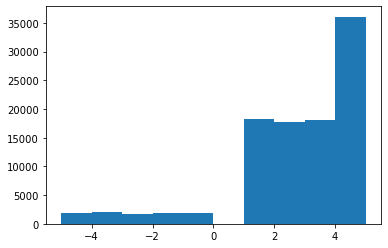

In [23]:
plt.hist(Customer_final.Qty)

(array([ 2144.,  1871.,  2020.,  1742.,  1517., 14664., 18621., 18710.,
        18826., 19178.]),
 array([-1.4990e+03, -1.1991e+03, -8.9920e+02, -5.9930e+02, -2.9940e+02,
         5.0000e-01,  3.0040e+02,  6.0030e+02,  9.0020e+02,  1.2001e+03,
         1.5000e+03]),
 <BarContainer object of 10 artists>)

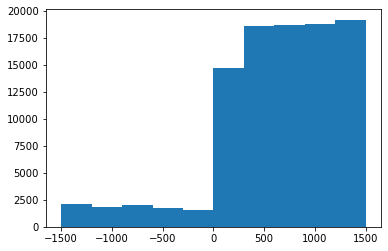

In [24]:
plt.hist(Customer_final.Rate)

(array([20919., 22795., 12985., 12683.,  8263.,  7978.,  4690.,  4537.,
         2210.,  2233.]),
 array([  7.35 ,  85.365, 163.38 , 241.395, 319.41 , 397.425, 475.44 ,
        553.455, 631.47 , 709.485, 787.5  ]),
 <BarContainer object of 10 artists>)

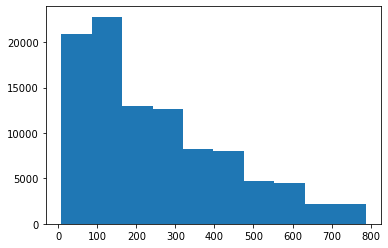

In [25]:
plt.hist(Customer_final.Tax)

(array([  447.,   966.,  1573.,  2437.,  3871., 38987., 23678., 14933.,
         8368.,  4033.]),
 array([-8270.925 , -6615.0825, -4959.24  , -3303.3975, -1647.555 ,
            8.2875,  1664.13  ,  3319.9725,  4975.815 ,  6631.6575,
         8287.5   ]),
 <BarContainer object of 10 artists>)

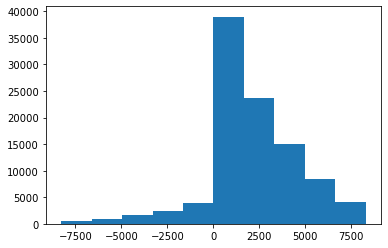

In [26]:
plt.hist(Customer_final.total_amt)

# frequency bars for categorical variables

<AxesSubplot:xlabel='Gender', ylabel='count'>

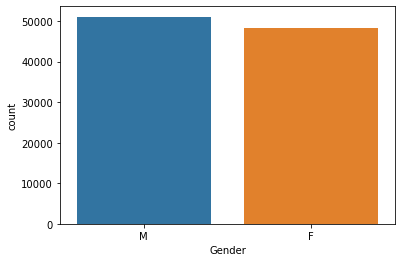

In [27]:
sns.countplot(Customer_final['Gender'])

<AxesSubplot:xlabel='prod_cat', ylabel='count'>

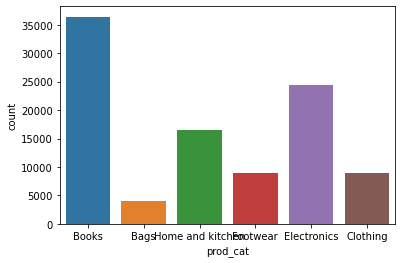

In [28]:
sns.countplot(Customer_final['prod_cat'])

<AxesSubplot:xlabel='prod_subcat', ylabel='count'>

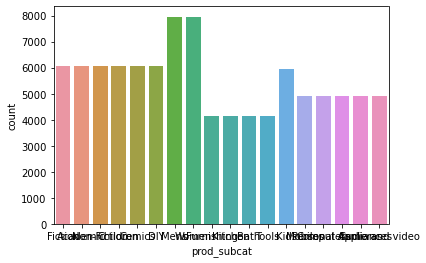

In [29]:
sns.countplot(Customer_final['prod_subcat'])

<AxesSubplot:xlabel='Store_type', ylabel='count'>

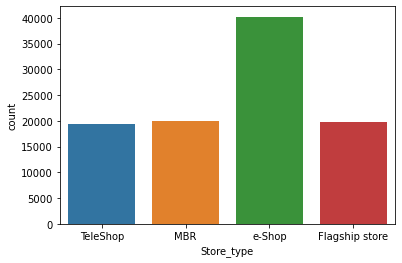

In [30]:
sns.countplot(Customer_final['Store_type'])

In [31]:
# Time period of the available transaction data
min_date=Customer_final.tran_date.min()
max_date=Customer_final.tran_date.max()
print("Time period of the available transaction data is "+min_date+" to "+max_date)

Time period of the available transaction data is 1/1/2012 to 9/9/2013


In [32]:
#Count of transactions where the total amount of transaction was negative
Customer_final.loc[Customer_final.total_amt < 0].transaction_id.count()

9294

In [33]:
#Analyze which product categories are more popular among females vs male customers
Customer_final.groupby(["Gender","prod_cat"]).Qty.sum()

Gender  prod_cat        
F       Bags                 4724
        Books               42420
        Clothing            10275
        Electronics         29160
        Footwear            11148
        Home and kitchen    19580
M       Bags                 4692
        Books               45522
        Clothing            11244
        Electronics         32380
        Footwear            10665
        Home and kitchen    20164
Name: Qty, dtype: int64

<AxesSubplot:xlabel='city_code'>

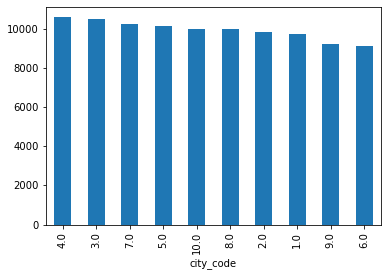

In [34]:
#Which City code has the maximum customers and what was the percentage of customers from that city? 
max_cust=Customer_final.groupby("city_code").customer_Id.count().sort_values(ascending=False)
max_cust


max_cust.plot(kind="bar")

### From the above graph we can see that the city 4.0 has maximum number of customers

In [35]:
#percentage of customers from that city(4.0)
percentof_max_cust=(Customer_final.groupby("city_code").customer_Id.count()/Customer_final.customer_Id.count()).sort_values(ascending=False)

percentof_max_cust.max()

0.10646269122697471

In [36]:
#Which store type sells the maximum products by value 
Customer_final.groupby(Customer_final.Store_type).Qty.sum()

Store_type
Flagship store    48007
MBR               48285
TeleShop          47339
e-Shop            98447
Name: Qty, dtype: int64

In [37]:
#Which store type sells the maximum products by value and by quantity?
Customer_final.groupby(Customer_final.Store_type)["Qty","Rate"].sum().sort_values(by=["Qty","Rate"],ascending=False)

,Qty,Rate
Store_type,,
e-Shop,98447,25690591
MBR,48285,12682308
Flagship store,48007,12715977
TeleShop,47339,12252103


### e-Shop store sells the maximum products by value and by quantity

### total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores


In [38]:
stores=Customer_final.pivot_table(index="prod_cat",columns="Store_type",values="total_amt",aggfunc="sum")

stores.loc[["Electronics","Clothing"],"Flagship store"].sum()

14658949.889999999

### What was the total amount earned from "Male" customers under the "Electronics" category?

In [39]:
cat=Customer_final.pivot_table(index="Gender",columns="prod_cat",values="total_amt",aggfunc="sum")
cat.loc["M","Electronics"]

28515547.125

### How many customers have more than 10 unique transactions, after removing all transactions 
### which have any negative amounts?

In [40]:
pos_tran=Customer_final.loc[Customer_final.total_amt>=0,:]
unique_tran=pos_tran.groupby(["cust_id","prod_cat","prod_subcat"]).transaction_id.count().reset_index()
nunique_tran=unique_tran.groupby(["cust_id"]).transaction_id.count().reset_index()
n=nunique_tran[nunique_tran["transaction_id"]>10].count()
n

cust_id           3214
transaction_id    3214
dtype: int64

In [61]:
#all customers aged between 25 - 35 are
Customer_final["age"]=pd.Timestamp.today() - Customer_final["DOB"]

In [73]:
Customer_final["age"]=round(Customer_final["age"].dt.days/365.25,0)

In [88]:
Customer_final=Customer_final.loc[Customer_final.age>24 ,:]
Customer_final=Customer_final.loc[Customer_final.age<36 ,:]
Customer_final["age"]

26760    35.0
26761    35.0
26762    35.0
26763    35.0
26764    35.0
         ... 
99288    30.0
99289    30.0
99290    30.0
99291    30.0
99292    30.0
Name: age, Length: 24246, dtype: float64

In [122]:
 #a. What was the total amount spent for “Electronics” and “Books” product categories?
cat=Customer_final.pivot_table(columns="prod_cat",values="total_amt",aggfunc="sum")
(cat.loc[:,["Books","Electronics"]].sum()).sum()

print('The total amount spent for “Electronics” and “Books” product categories is',
      (cat.loc[:,["Books","Electronics"]].sum()).sum())

The total amount spent for “Electronics” and “Books” product categories is 30569228.3


In [101]:
#. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [114]:
Customer_final.tran_date=pd.to_datetime(Customer_final.tran_date)

In [121]:
total_amount = Customer_final[(Customer_final['tran_date'] >='2014-01-01') & (Customer_final['tran_date'] <='2014-03-01')]
total_amount.total_amt.sum()   

print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 1708854.875
